In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
dt = pd.read_excel(r'C:\Users\tyagir01\Desktop\Mileage.xlsx')
dt.head()

,Miles_per_Gallon,Weight_of_vehicle
0,28.7,2289
1,29.2,2113
2,34.2,2180
3,27.9,2448
4,33.3,2026


Text(0.5, 0, 'Vehicle Weight(in Kgs)')

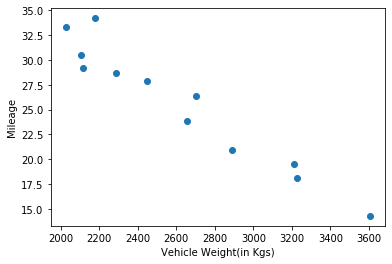

In [3]:
plt.scatter(dt['Weight_of_vehicle'], dt['Miles_per_Gallon'])
plt.ylabel('Mileage')
plt.xlabel('Vehicle Weight(in Kgs)')

In [4]:
X = dt['Weight_of_vehicle']
y = dt['Miles_per_Gallon']
x = sm.add_constant(X)
mdl = sm.OLS(y,x).fit()
print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:       Miles_per_Gallon   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sat, 16 May 2020   Prob (F-statistic):           2.85e-07
Time:                        17:01:44   Log-Likelihood:                -22.091
No. Observations:                  12   AIC:                             48.18
Df Residuals:                      10   BIC:                             49.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                56.0957      2.58

C:\Users\tyagir01\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [5]:
Std_rsd = mdl.resid_pearson
Std_rsd

array([-0.44511273, -1.37252481,  2.08753315,  0.18422536,  0.47540179,
        1.05668329, -0.75350063, -0.64311699, -0.25953343,  0.4879158 ,
        0.12130227, -0.93927307])

In [7]:
y_hat = mdl.predict(x)
y_hat

0     29.443573
1     31.492839
2     30.712721
3     27.592247
4     32.505829
5     24.634783
6     25.158743
7     31.574344
8     18.533557
9     18.684924
10    14.097361
11    22.469081
dtype: float64

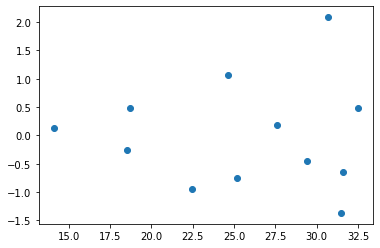

In [8]:
plt.scatter(y_hat, Std_rsd)

#it gives inconsistent variance of residuals which violates our model assumptions.

In [9]:
# solution to this is taking log of 'Dependent Variable'
Y = np.log(y)
Y

0     3.356897
1     3.374169
2     3.532226
3     3.328627
4     3.505557
5     3.273364
6     3.173878
7     3.417727
8     2.895912
9     2.970414
10    2.660260
11    3.039749
Name: Miles_per_Gallon, dtype: float64

In [10]:
model = sm.OLS(Y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Miles_per_Gallon   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sat, 16 May 2020   Prob (F-statistic):           9.84e-08
Time:                        17:20:42   Log-Likelihood:                 17.005
No. Observations:                  12   AIC:                            -30.01
Df Residuals:                      10   BIC:                            -29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5242      0.09

In [12]:
E = model.resid_pearson
E

array([-0.31630114, -1.42005514,  1.5623004 ,  0.48370101, -0.0537228 ,
        1.60448776, -0.29474869, -0.79674991, -0.18335787,  0.87474775,
       -0.87956572, -0.58073564])

In [13]:
y_log_hat = model.predict(x)
y_log_hat

0     3.377221
1     3.465414
2     3.431840
3     3.297547
4     3.509009
5     3.170268
6     3.192817
7     3.468922
8     2.907694
9     2.914208
10    2.716776
11    3.077064
dtype: float64

Text(0.5, 0, 'Independent Variable')

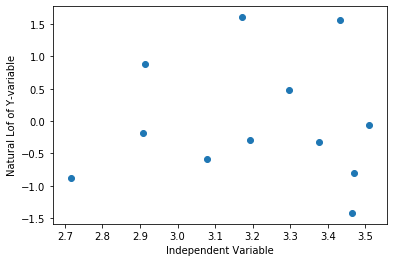

In [15]:
plt.scatter(y_log_hat,E)
plt.ylabel('Natural Lof of Y- variable')
plt.xlabel('Independent Variable')